# Modern Portfolio Theory (MPT) and Capital Asset Pricing Model (CAPM)
This notebook demonstrates the concepts of Modern Portfolio Theory (MPT) and the Capital Asset Pricing Model (CAPM) using real stock data. We will use historical data from Apple (AAPL) and Microsoft (MSFT) to explore the benefits of diversification and understand how to construct an efficient portfolio.

## Data Loading
We will start by loading historical stock prices for Apple (AAPL), Microsoft (MSFT), and the S&P 500 Index (^GSPC) as the market benchmark.


[*********************100%%**********************]  3 of 3 completed


Ticker           AAPL       MSFT        ^GSPC
Date                                         
2015-01-02  24.373962  40.232849  2058.199951
2015-01-05  23.687305  39.862888  2020.579956
2015-01-06  23.689533  39.277809  2002.609985
2015-01-07  24.021713  39.776836  2025.900024
2015-01-08  24.944681  40.946991  2062.139893


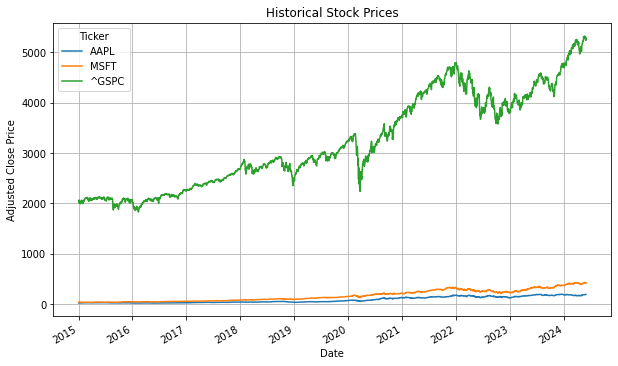

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the stock symbols and the date range
stocks = ['AAPL', 'MSFT', '^GSPC']  # '^GSPC' is the S&P 500 index
start_date = '2015-01-01'
end_date = '2024-06-01'

# Download the data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Display the first few rows of the dataset
print(data.head())

# Plot the adjusted closing prices for both stocks
data.plot(figsize=(10, 6))
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


## Normalizing Stock Prices
To better compare the relative performance of Apple (AAPL), Microsoft (MSFT), and the S&P 500 Index (^GSPC), we'll normalize the stock prices so that they all start at the same value at the beginning of the period. This allows us to see how much each stock has grown (or shrunk) relative to the others.


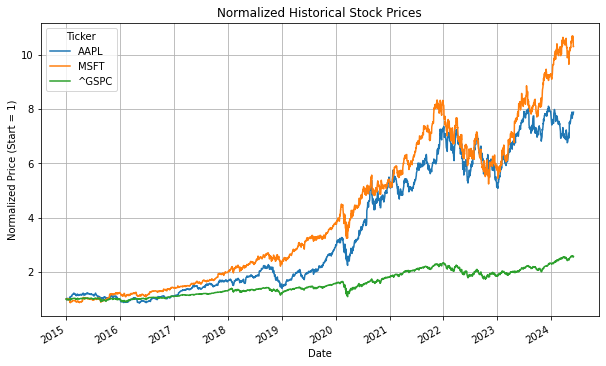

In [6]:
# Normalize the data to start at 1
normalized_data = data / data.iloc[0]

# Plot the normalized prices
normalized_data.plot(figsize=(10, 6))
plt.title('Normalized Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Start = 1)')
plt.grid(True)
plt.show()


## Calculating Returns and Basic Statistics
Next, we'll calculate the daily returns for each stock. These returns will be used to compute the mean returns and the standard deviations, which are essential inputs for constructing the efficient frontier and for calculating the CAPM expected returns.


In [2]:
# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate mean returns and standard deviations
mean_returns = returns.mean()
std_devs = returns.std()

# Display the calculated values
print(f"Mean Returns:\n{mean_returns}\n")
print(f"Standard Deviations:\n{std_devs}\n")


Mean Returns:
Ticker
AAPL     0.001036
MSFT     0.001135
^GSPC    0.000463
dtype: float64

Standard Deviations:
Ticker
AAPL     0.018131
MSFT     0.017335
^GSPC    0.011378
dtype: float64



### Understanding Mean Returns and Standard Deviations

We calculated the mean daily returns and standard deviations (volatility) for Apple (AAPL), Microsoft (MSFT), and the S&P 500 Index (^GSPC).

**Mean Returns** represent the average daily return:
- **AAPL:** 0.001036
- **MSFT:** 0.001135
- **^GSPC:** 0.000463

*Interpretation:* MSFT has the highest average daily return, followed closely by AAPL. The S&P 500 has a lower mean return, expected from a diversified index.

**Standard Deviations** measure the volatility of returns:
- **AAPL:** 0.018131
- **MSFT:** 0.017335
- **^GSPC:** 0.011378

*Interpretation:* AAPL shows the highest volatility, indicating more daily return fluctuations. The S&P 500 has the lowest volatility, reflecting the reduced risk of a diversified portfolio.

*Key Takeaway:* Higher potential returns come with higher risk (volatility). Understanding this risk-return trade-off is crucial in portfolio construction.


## Modern Portfolio Theory (MPT)
Modern Portfolio Theory (MPT) aims to construct an optimal portfolio that offers the highest expected return for a given level of risk. The Efficient Frontier represents the set of optimal portfolios.

### Constructing the Efficient Frontier
We will simulate multiple portfolio combinations to visualize the Efficient Frontier.


### Efficient Frontier Simulation

This code simulates 10,000 random portfolios to illustrate the Efficient Frontier:

- **Portfolio Combinations:** Generated using random weights across selected stocks.
- **Metrics Calculated:**
  - **Expected Return:** Weighted sum of individual stock returns.
  - **Volatility:** Portfolio risk, derived from the covariance matrix.
  - **Sharpe Ratio:** Risk-adjusted return (Return / Volatility).
- **Plot:** 
  - **X-axis:** Portfolio Volatility.
  - **Y-axis:** Portfolio Return.
  - **Color:** Indicates Sharpe Ratio (higher is better).

The plot visualizes the trade-off between risk and return, highlighting optimal portfolios on the Efficient Frontier.


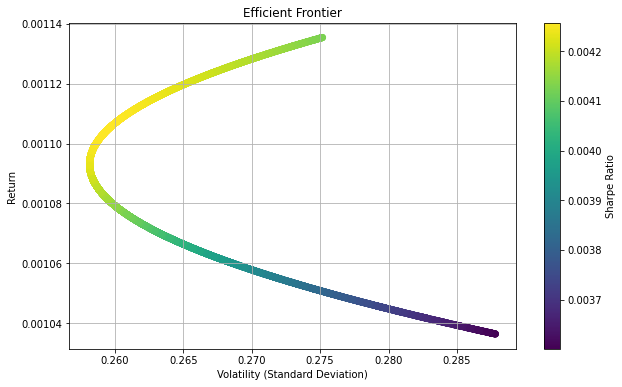

In [3]:
from itertools import combinations
import matplotlib.pyplot as plt

# Number of portfolio combinations to simulate
num_portfolios = 10000
results = np.zeros((4, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(stocks)-1)  # excluding S&P 500
    weights /= np.sum(weights)
    
    # Expected portfolio return and volatility
    portfolio_return = np.sum(weights * mean_returns[:-1])
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.iloc[:, :-1].cov() * 252, weights)))

    # Store the results in the results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]
    results[3,i] = np.dot(weights, np.dot(returns.iloc[:, :-1].cov(), weights))

# Plot the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1,:], results[0,:], c=results[2,:], marker='o', cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


## Capital Asset Pricing Model (CAPM)
The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk (measured by beta) and expected return for assets.

The formula for CAPM is:

$$ E(R_i) = R_f + \beta_i \cdot \left( E(R_m) - R_f \right) $$

Where:
- $ E(R_i) $ is the expected return of the asset
- $ R_f $ is the risk-free rate
- $ \beta_i $ is the beta of the asset
- $ E(R_m) $ is the expected return of the market

### Calculating Beta and Expected Returns
We'll calculate the beta for Apple and Microsoft relative to the S&P 500 and then use the CAPM formula to estimate their expected returns.


In [4]:
# Calculate the beta for each stock with respect to the S&P 500
market_returns = returns['^GSPC']
betas = {}

for stock in stocks[:-1]:
    covariance = np.cov(returns[stock], market_returns)[0][1]
    beta = covariance / market_returns.var()
    betas[stock] = beta

# Assuming a risk-free rate of 1%
risk_free_rate = 0.01
market_return = mean_returns['^GSPC']

# Calculate expected returns using CAPM
capm_expected_returns = {}
for stock in stocks[:-1]:
    expected_return = risk_free_rate + betas[stock] * (market_return - risk_free_rate)
    capm_expected_returns[stock] = expected_return

print(f"CAPM Expected Returns:\n{capm_expected_returns}")
print(f"Betas:\n{betas}")


CAPM Expected Returns:
{'AAPL': -0.0014603292669079972, 'MSFT': -0.0016298346417236327}
Betas:
{'AAPL': 1.201635252675966, 'MSFT': 1.219408183030128}


### Interpreting the CAPM Output

- **CAPM Expected Returns:**
  - The expected return for Apple (AAPL) is -0.00146.
  - The expected return for Microsoft (MSFT) is -0.00163.

  These negative expected returns suggest that, based on the CAPM model, both AAPL and MSFT are projected to underperform the risk-free rate given the market conditions during the analyzed period.

- **Betas:**
  - Apple's Beta: 1.20
  - Microsoft's Beta: 1.22

  Beta measures a stock's volatility relative to the market (in this case, the S&P 500). A beta greater than 1 indicates that the stock is more volatile than the market:
  - **AAPL's Beta of 1.20** means it is 20% more volatile than the market.
  - **MSFT's Beta of 1.22** means it is 22% more volatile than the market.

  Higher beta values suggest that these stocks carry more risk, but potentially higher returns compared to the overall market.


## Benefits of Diversification
Diversification helps to reduce the risk (volatility) of a portfolio by combining assets with low or negative correlations. We'll now compare the volatility of an equally weighted portfolio of Apple and Microsoft against the individual stocks.

### Calculating Portfolio Risk and Return
We will calculate the expected return and volatility of a portfolio with equal weights in Apple and Microsoft.


In [5]:
# Portfolio of Apple and Microsoft
weights = np.array([0.5, 0.5])  # Equal weights for simplicity

# Expected portfolio return and volatility
portfolio_return = np.sum(weights * mean_returns[:-1])
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(returns.iloc[:, :-1].cov() * 252, weights)))

print(f"Portfolio Return: {portfolio_return:.4f}")
print(f"Portfolio Volatility (Standard Deviation): {portfolio_std_dev:.4f}")

# Compare individual and portfolio risks
print(f"Apple Volatility: {std_devs['AAPL']:.4f}")
print(f"Microsoft Volatility: {std_devs['MSFT']:.4f}")


Portfolio Return: 0.0011
Portfolio Volatility (Standard Deviation): 0.2586
Apple Volatility: 0.0181
Microsoft Volatility: 0.0173


# Conclusion
In this notebook, we demonstrated the benefits of diversification, the application of Modern Portfolio Theory (MPT), and how the Capital Asset Pricing Model (CAPM) can be used to estimate the expected returns of stocks.

Key takeaways:
- **Diversification** helps in reducing the risk of a portfolio without necessarily reducing returns.
- **Modern Portfolio Theory (MPT)** provides a framework to construct portfolios that optimize return for a given level of risk.
- **Capital Asset Pricing Model (CAPM)** helps in understanding the relationship between risk (measured by beta) and expected return.

By combining these concepts, investors can construct portfolios that align with their risk tolerance while maximizing potential returns.
